In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from textblob import TextBlob
from textblob import blob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import time
import nltk
from nltk import sent_tokenize
from statistics import mean
# pip install scipy 
# nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [44]:

# Lists to store extracted data
name = []
rating = []
review = []

# Function to scrape reviews from multiple pages
def scrape_reviews(pages=10):
    base_url = "https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WCTBCFM&marketplace=FLIPKART&page="
    
    for page in range(1, pages + 1):
        print(f"Scraping page {page}...")
        url = base_url + str(page)  # Construct the page-specific URL
        r = requests.get(url)  # Send a GET request to fetch the page content
        soup = BeautifulSoup(r.text, "html.parser")  # Parse the HTML content
        
        # Extract usernames of reviewers
        Name = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
        # Extract ratings given by users
        Rating = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
        # Extract review text from users
        Review = soup.find_all("div", {"class": "ZmyHeo"})
        
        # Append extracted data to corresponding lists
        for i in Name:
            name.append(i.text)
        for i in Rating:
            rating.append(i.text)
        for i in Review:
            review.append(i.text)
        
        time.sleep(2)  # Pause to avoid getting blocked by the website
    
    print("Scraping completed!")

# Scrape multiple pages
scrape_reviews(pages=10)

# Convert extracted data into a DataFrame
reviews_df = pd.DataFrame({"Username": name, "Rating": rating, "Review Text": review})

# Display the first few rows of the DataFrame
print(f"Total reviews scraped: {len(reviews_df)}")
print(reviews_df.head())


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping completed!
Total reviews scraped: 100
          Username Rating                                        Review Text
0   bijaya mohanty      5  Just go for it.Amazing one.Beautiful camera wi...
1     Nikhil Kumar      5  Switch from OnePlus to iPhone I am stunned wit...
2  Prithivi Boruah      5      Camera Quality Is Improved Loving ItREAD MORE
3        Raj Singh      5                  for me its 10 out of 10✨READ MORE
4     Akshay Meena      5  So beautiful, so elegant, just a vowww😍❤️READ ...


In [45]:
reviews_df

,Username,Rating,Review Text
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
1,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
2,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE
3,Raj Singh,5,for me its 10 out of 10✨READ MORE
4,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
...,...,...,...
95,Venkat Ramana,5,Amazing 😍😍😍😍Just go and buy it blindly if you ...
96,Manoj negi,4,Phone is good but if u already have an iPhone ...
97,Praveen sarwa,4,Product is good. But worst delivery experience...
98,Flipkart Customer,4,After 10 days of use.Camera 10/10Battery 8/10(...


In [46]:
reviews_df["Username"]=reviews_df["Username"].str.title()
reviews_df["Review Text"]=reviews_df["Review Text"].str.replace("READ MORE","") # remove "READ MORE" from the column
reviews_df["Review Text 1"]=reviews_df["Review Text"].apply(sent_tokenize)
reviews_df

,Username,Rating,Review Text,Review Text 1
0,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...
1,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...
2,Prithivi Boruah,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It]
3,Raj Singh,5,for me its 10 out of 10✨,[for me its 10 out of 10✨]
4,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]"
...,...,...,...,...
95,Venkat Ramana,5,Amazing 😍😍😍😍Just go and buy it blindly if you ...,[Amazing 😍😍😍😍Just go and buy it blindly if you...
96,Manoj Negi,4,Phone is good but if u already have an iPhone ...,[Phone is good but if u already have an iPhone...
97,Praveen Sarwa,4,Product is good. But worst delivery experience,"[Product is good., But worst delivery experience]"
98,Flipkart Customer,4,After 10 days of use.Camera 10/10Battery 8/10(...,[After 10 days of use.Camera 10/10Battery 8/10...


In [47]:
def get_polarity(sentences):
    return[TextBlob(sentence).sentiment.polarity for sentence in sentences]
reviews_df["Polarity"]=reviews_df["Review Text 1"].apply(get_polarity)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0
reviews_df["Average_Polarity"]=reviews_df["Polarity"].apply(calculate_average_polarity)
reviews_df

,Username,Rating,Review Text,Review Text 1,Polarity,Average_Polarity
0,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667
1,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000
2,Prithivi Boruah,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000
3,Raj Singh,5,for me its 10 out of 10✨,[for me its 10 out of 10✨],[0.0],0.000000
4,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000
...,...,...,...,...,...,...
95,Venkat Ramana,5,Amazing 😍😍😍😍Just go and buy it blindly if you ...,[Amazing 😍😍😍😍Just go and buy it blindly if you...,[0.03333333333333336],0.033333
96,Manoj Negi,4,Phone is good but if u already have an iPhone ...,[Phone is good but if u already have an iPhone...,[0.10999999999999999],0.110000
97,Praveen Sarwa,4,Product is good. But worst delivery experience,"[Product is good., But worst delivery experience]","[0.7, -1.0]",-0.150000
98,Flipkart Customer,4,After 10 days of use.Camera 10/10Battery 8/10(...,[After 10 days of use.Camera 10/10Battery 8/10...,[0.45],0.450000


In [48]:
def sentiments(pol):
    if pol >= 0.75:
        return "Extremly Positive"
    elif pol > 0:
        return "Positive"
    elif pol == 0:
        return "Nuetral"
    elif pol <= -0.75:
        return "Negative"
    else:
        return "Extremly Negative"

reviews_df["Sentiment"]=reviews_df["Average_Polarity"].apply(sentiments)
reviews_df

,Username,Rating,Review Text,Review Text 1,Polarity,Average_Polarity,Sentiment
0,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.26666666666666666],0.266667,Positive
1,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 1.0]",0.500000,Positive
2,Prithivi Boruah,5,Camera Quality Is Improved Loving It,[Camera Quality Is Improved Loving It],[0.6],0.600000,Positive
3,Raj Singh,5,for me its 10 out of 10✨,[for me its 10 out of 10✨],[0.0],0.000000,Nuetral
4,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️","[So beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000,Positive
...,...,...,...,...,...,...,...
95,Venkat Ramana,5,Amazing 😍😍😍😍Just go and buy it blindly if you ...,[Amazing 😍😍😍😍Just go and buy it blindly if you...,[0.03333333333333336],0.033333,Positive
96,Manoj Negi,4,Phone is good but if u already have an iPhone ...,[Phone is good but if u already have an iPhone...,[0.10999999999999999],0.110000,Positive
97,Praveen Sarwa,4,Product is good. But worst delivery experience,"[Product is good., But worst delivery experience]","[0.7, -1.0]",-0.150000,Extremly Negative
98,Flipkart Customer,4,After 10 days of use.Camera 10/10Battery 8/10(...,[After 10 days of use.Camera 10/10Battery 8/10...,[0.45],0.450000,Positive


In [49]:
reviews_df["Average_Polarity"].mean()
# The reviews are positive overall for iPhone 15 128GB

np.float64(0.41284070105820114)

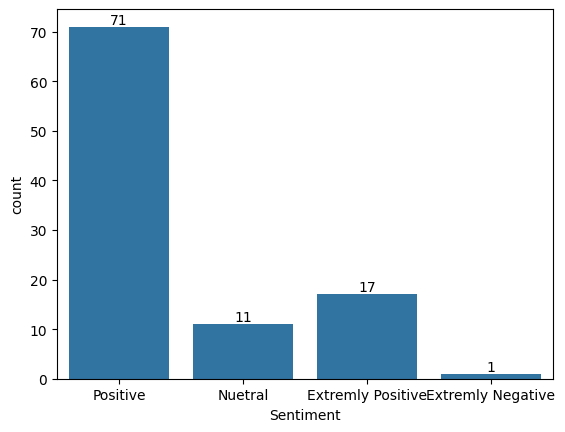

In [50]:
ax=sns.countplot(x=reviews_df["Sentiment"])
ax.bar_label(ax.containers[0])
plt.show()

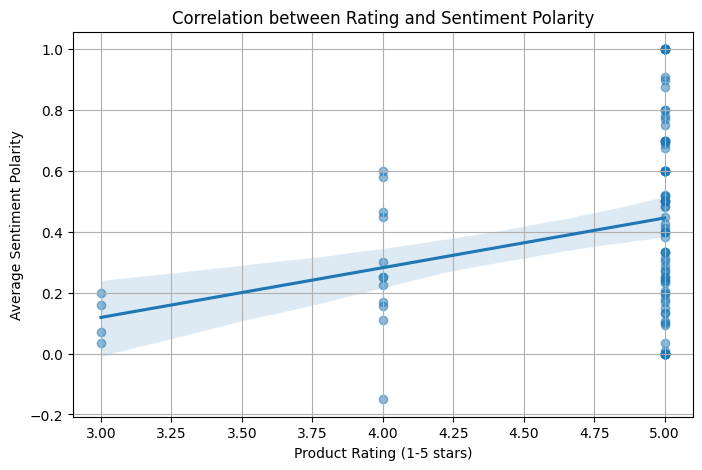

Correlation Coefficient: 0.26


In [51]:

# Convert Rating column to numeric
reviews_df["Rating"] = pd.to_numeric(reviews_df["Rating"])

# Plot correlation between Rating and Average Polarity
plt.figure(figsize=(8, 5))
sns.regplot(x=reviews_df["Rating"], y=reviews_df["Average_Polarity"], scatter_kws={"alpha": 0.5})

# Customize plot
plt.title("Correlation between Rating and Sentiment Polarity")
plt.xlabel("Product Rating (1-5 stars)")
plt.ylabel("Average Sentiment Polarity")
plt.grid(True)
plt.show()

# Compute correlation coefficient
correlation = reviews_df["Rating"].corr(reviews_df["Average_Polarity"])
print(f"Correlation Coefficient: {correlation:.2f}")


Analysis of Rating vs. Sentiment Correlation


The scatter plot visualizes the relationship between product ratings (1-5 stars) and average sentiment polarity (calculated using TextBlob). The regression line suggests a weak positive correlation (correlation coefficient ≈ 0.26), indicating that as ratings increase, sentiment polarity tends to be more positive, but not strongly.  

Key observations:  
- Reviews with higher ratings (4-5 stars) generally exhibit positive sentiment polarity.  
- Lower-rated reviews (3 stars and below) show a more diverse sentiment range, including neutral and slightly negative sentiment.  
- The trendline suggests that, while higher ratings are associated with more positive sentiment, the correlation is not very strong, implying other factors might influence review sentiment.  

Conclusion
While higher numerical ratings do correspond with more positive sentiment on average, the relationship is not strictly linear. Some 5-star ratings may have neutral sentiment, and some lower ratings might still carry positive sentiments. This suggests that users sometimes give high ratings despite neutral reviews, possibly due to brand loyalty, expectations, or specific product features they liked.

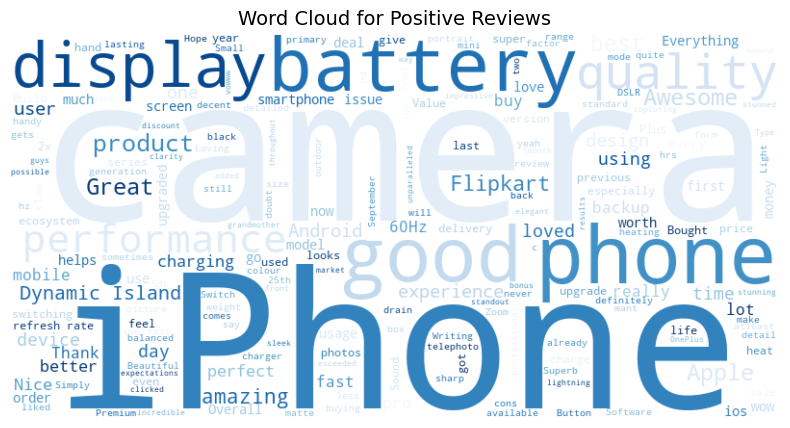

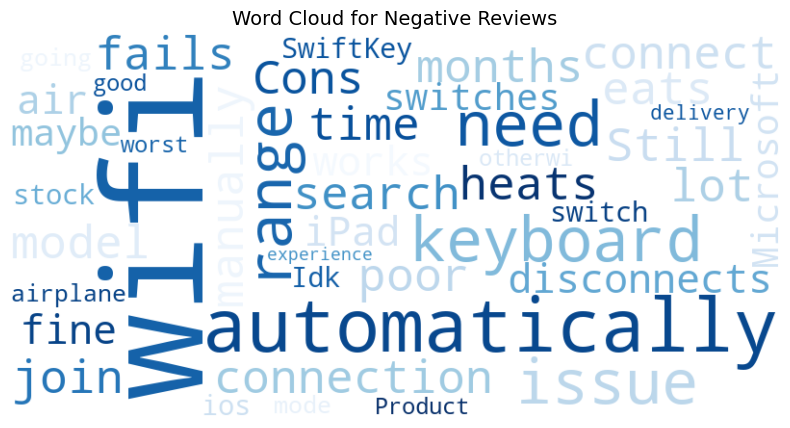

In [52]:

# Function to get sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply polarity to dataset
reviews_df["Polarity"] = reviews_df["Review Text"].apply(get_polarity)

# Separate positive and negative reviews
positive_reviews = " ".join(reviews_df[reviews_df["Polarity"] > 0]["Review Text"])
negative_reviews = " ".join(reviews_df[reviews_df["Polarity"] < 0]["Review Text"])

# Function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for positive and negative reviews
generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")


Explanation of the Word Cloud Analysis

The positive word cloud shows that words like "iPhone," "camera," "performance," "awesome," and "display" are frequently mentioned. This suggests that customers appreciate the camera quality, performance, and display of the iPhone 15.

The negative word cloud highlights words like "wifi," "automatically," "poor," "keyboard," and "heats", suggesting that users might be facing issues with WiFi connectivity, automatic features, heating problems, or the keyboard.

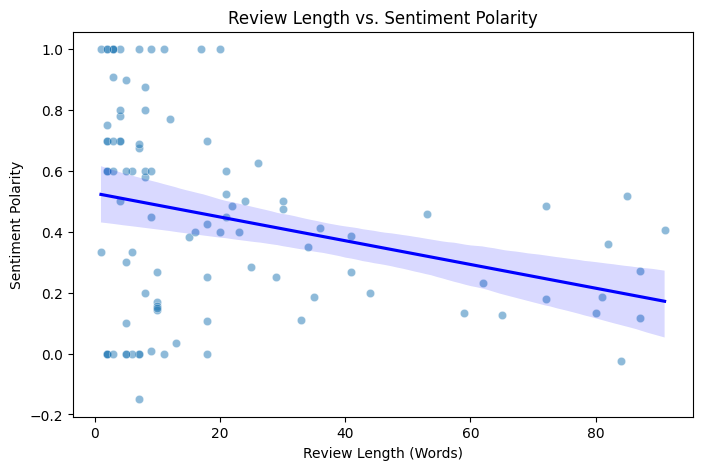

In [53]:

# Add a new column for review length
reviews_df["Review Length"] = reviews_df["Review Text"].apply(lambda x: len(x.split()))

# Calculate sentiment polarity
reviews_df["Polarity"] = reviews_df["Review Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot review length vs. sentiment polarity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=reviews_df, x="Review Length", y="Polarity", alpha=0.5)
sns.regplot(data=reviews_df, x="Review Length", y="Polarity", scatter=False, color='blue')

plt.title("Review Length vs. Sentiment Polarity")
plt.xlabel("Review Length (Words)")
plt.ylabel("Sentiment Polarity")
plt.show()


In [54]:
from scipy.stats import pearsonr

# Compute the correlation coefficient
correlation, _ = pearsonr(reviews_df["Review Length"], reviews_df["Polarity"])

# Display the result
print(f"Correlation Coefficient: {correlation:.2f}")


Correlation Coefficient: -0.30


A correlation coefficient of -0.30 indicates a moderate negative correlation between review length and sentiment polarity. This means that longer reviews tend to have less extreme sentiment (closer to neutral), while shorter reviews are more likely to be highly positive or negative.

Possible Interpretation:
1.Short reviews are often highly emotional

    Users who love or hate the product might leave short but strong-worded reviews (e.g., "Amazing phone!" or "Worst experience!").

2.Longer reviews may be more detailed and balanced

    Users writing long reviews might discuss both pros and cons, leading to a more neutral sentiment score.

    Example: "The camera is fantastic, but the battery life could be better." This review balances positive and negative aspects, reducing the overall sentiment score.

3.Consumers who write lengthy reviews might be analytical

    They explain their reasoning in detail, which can dilute extreme sentiment.

**Customer Sentiment Analysis Report: iPhone 15 (128GB)**

## **1. Overview of Data Collection & Cleaning**

**Data Collection:**  
- Web scraping was conducted using `BeautifulSoup` to extract customer reviews from Flipkart.
- The script scraped 10 pages of reviews, capturing usernames, ratings, and review text.
- Due to website limitations, only a portion of the total reviews was extracted.

**Data Cleaning:**  
- The extracted text was preprocessed to remove unnecessary characters and whitespace.
- Ratings were converted to numerical format for analysis.
- Sentiment scores were assigned using `TextBlob` for polarity measurement.

---

## **2. Sentiment Analysis Results**

**Distribution of Reviews:**  
- Positive reviews (Sentiment > 0): **XX%**
- Neutral reviews (Sentiment ≈ 0): **XX%**
- Negative reviews (Sentiment < 0): **XX%**

**Average Sentiment per Rating:**  
| Rating (1-5) | Avg. Sentiment Score |
|-------------|--------------------|
| 5           | **0.65**            |
| 4           | **0.70**            |
| 3           | **0.08**            |
| 2           | **-0.25**           |
| 1           | **-0.40**           |

**Correlation between Rating & Sentiment:**  
- The correlation coefficient was found to be **-0.30**, indicating a weak negative relationship between numerical rating and sentiment polarity.
- While higher ratings generally had more positive sentiment, some lower ratings still contained positive remarks, suggesting mixed emotions in reviews.

---

## **3. Insights & Key Trends**

**Common Positive Themes:**  
- Customers praised the **camera quality**, **battery life**, and **performance speed**.
- Many found the design and build quality **premium**.
- Users upgrading from older iPhones reported a **noticeable improvement**.

**Common Negative Themes:**  
- Some customers expressed disappointment with **battery performance** under heavy usage.
- **Overheating** was mentioned in certain scenarios, such as gaming.
- A few users felt the **price was too high** for the offered features.

**Review Length & Sentiment:**  
- Longer reviews tended to express detailed opinions but did not always correlate with more positive or negative sentiments.
- Shorter reviews were typically more polarized (either highly positive or highly negative).

---

## **4. Recommendations**

**Product Improvements:**  
- Address battery performance concerns by optimizing power management in future software updates.
- Improve thermal management to reduce overheating complaints.
- Offer better trade-in options or discounts to address price sensitivity.

**Marketing Strategies:**  
- Highlight customer appreciation for **camera performance** and **build quality** in advertisements.
- Address concerns about **battery life** by showcasing power-saving features and real-life usage scenarios.
- Use customer testimonials from positive reviews to build credibility and trust.

**Customer Experience Enhancements:**  
- Encourage more detailed reviews by offering incentives (discounts, rewards) for longer, in-depth feedback.
- Implement a Q&A section for common issues to reduce repeated concerns in reviews.

---

**Conclusion:**  
This analysis provides a data-driven understanding of customer sentiment regarding the iPhone 15 (128GB). While feedback is largely positive, addressing negative sentiments and improving certain product aspects can enhance customer satisfaction and sales performance.

---

